In [10]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

# List of attack types and benign type
attack_types = ["Bot", "DDoS", "DoS GoldenEye", "DoS Hulk", "DoS Slowhttptest", "DoS slowloris", "FTP-Patator",
                "Heartbleed", "Infiltration", "PortScan", "SSH-Patator", "Web Attack  Brute Force",
                "Web Attack  Sql Injection", "Web Attack  XSS"]
benign_type = "BENIGN"

# Loop through each attack type
for attack_type in attack_types:
    # Load the new data file
    input = f"{attack_type}_vs_{benign_type}.csv"
    new_data = pd.read_csv(input)

    # Separate features (X) and labels (y)
    X = new_data.drop(columns=[" Label"])
    y = new_data[" Label"]

    # Skip undersampling if there are not enough classes
    if y.nunique() <= 1:
        print(f"Skipping {attack_type}, not enough classes")
        continue

    # Perform undersampling using RandomUnderSampler
    sampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
    X_resampled, y_resampled = sampler.fit_resample(X, y)

    # Create a resample dataframe
    resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
    resampled_data[" Label"] = y_resampled  # Ensure label column is correctly named

    # Save the resampled data back to the original file
    resampled_data.to_csv(input, index=False)
    print(f"Resampled and saved {input}")

Resampled and saved Bot_vs_BENIGN.csv
Resampled and saved DDoS_vs_BENIGN.csv
Resampled and saved DoS GoldenEye_vs_BENIGN.csv
Resampled and saved DoS Hulk_vs_BENIGN.csv
Resampled and saved DoS Slowhttptest_vs_BENIGN.csv
Resampled and saved DoS slowloris_vs_BENIGN.csv
Resampled and saved FTP-Patator_vs_BENIGN.csv
Resampled and saved Heartbleed_vs_BENIGN.csv
Resampled and saved Infiltration_vs_BENIGN.csv
Resampled and saved PortScan_vs_BENIGN.csv
Resampled and saved SSH-Patator_vs_BENIGN.csv
Skipping Web Attack  Brute Force, not enough classes
Skipping Web Attack  Sql Injection, not enough classes
Skipping Web Attack  XSS, not enough classes


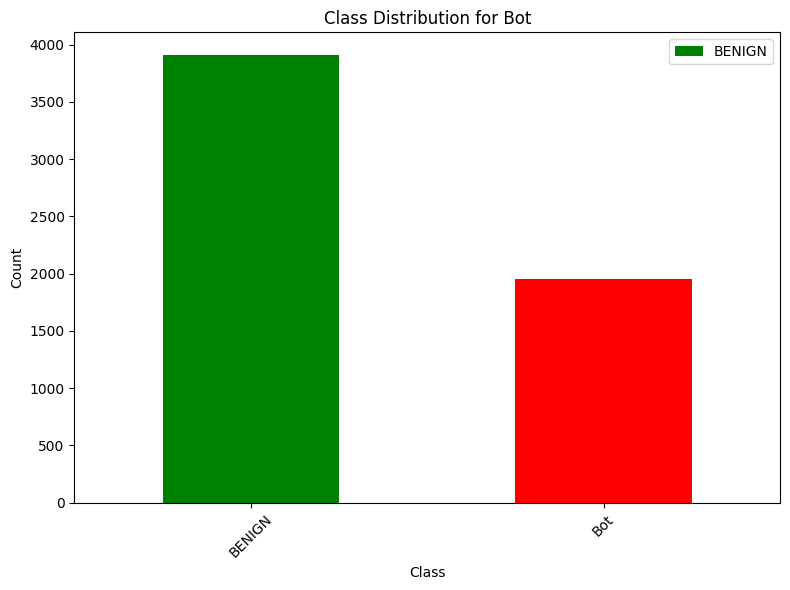

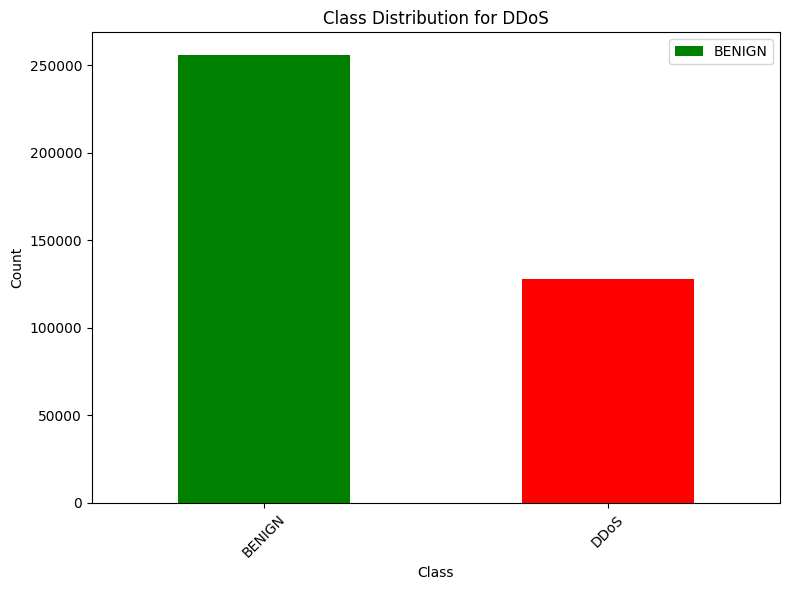

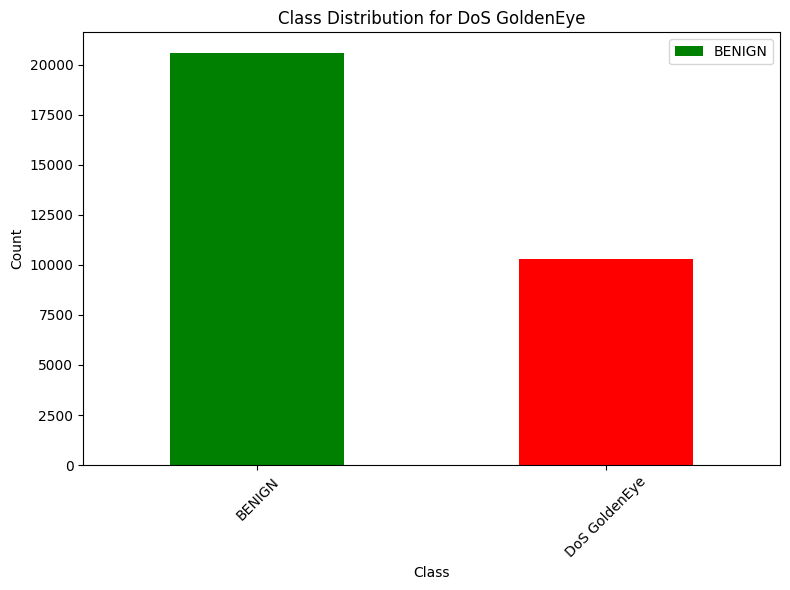

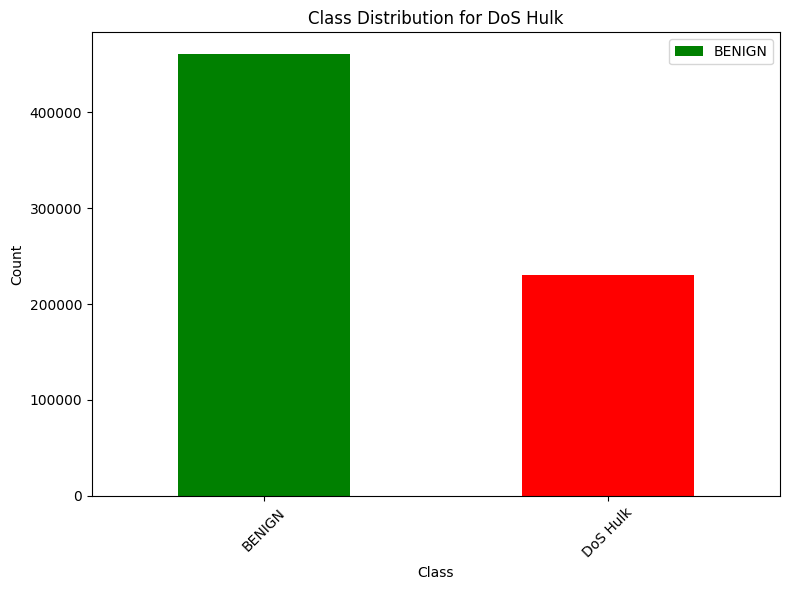

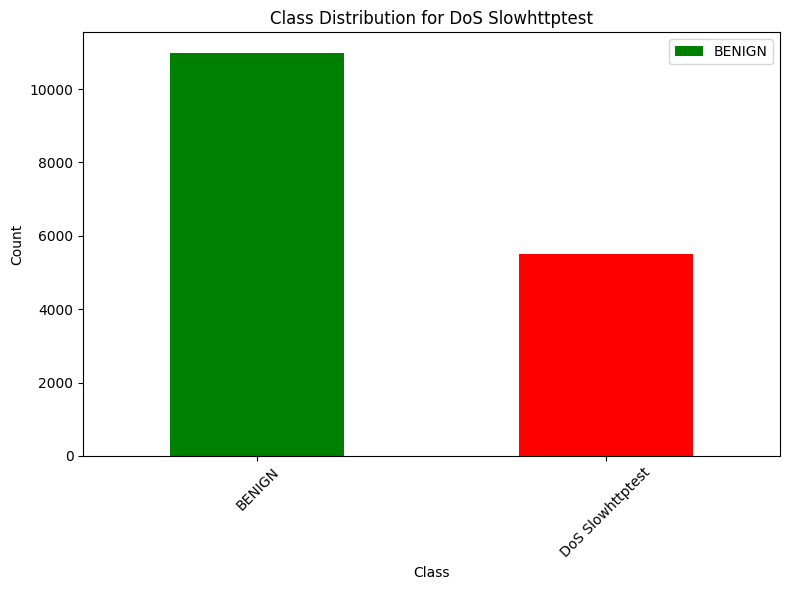

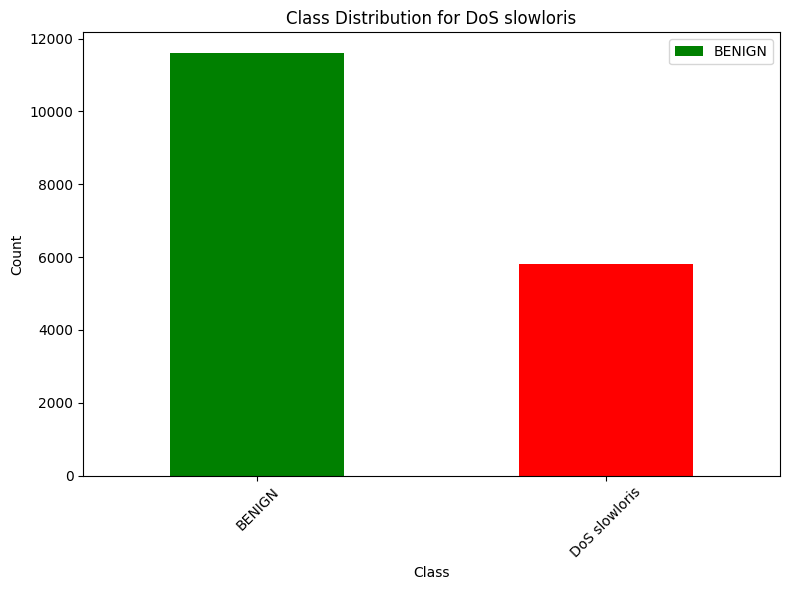

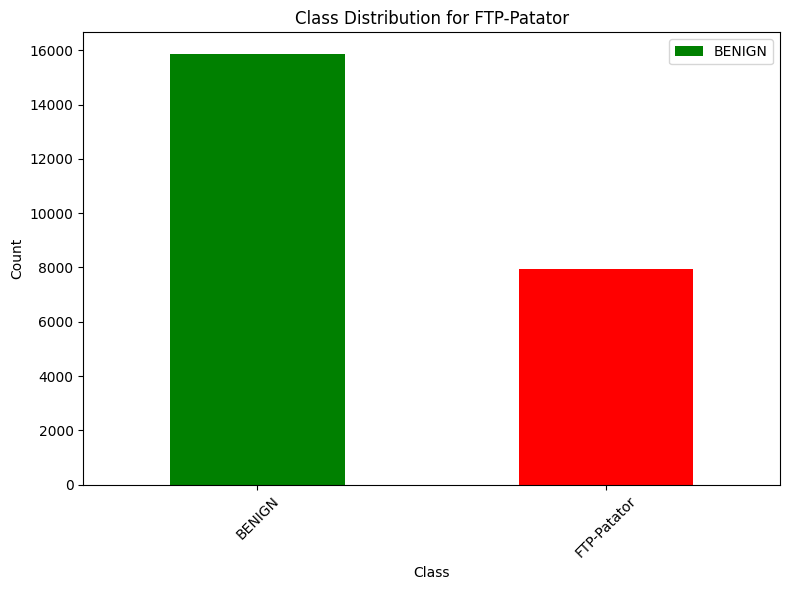

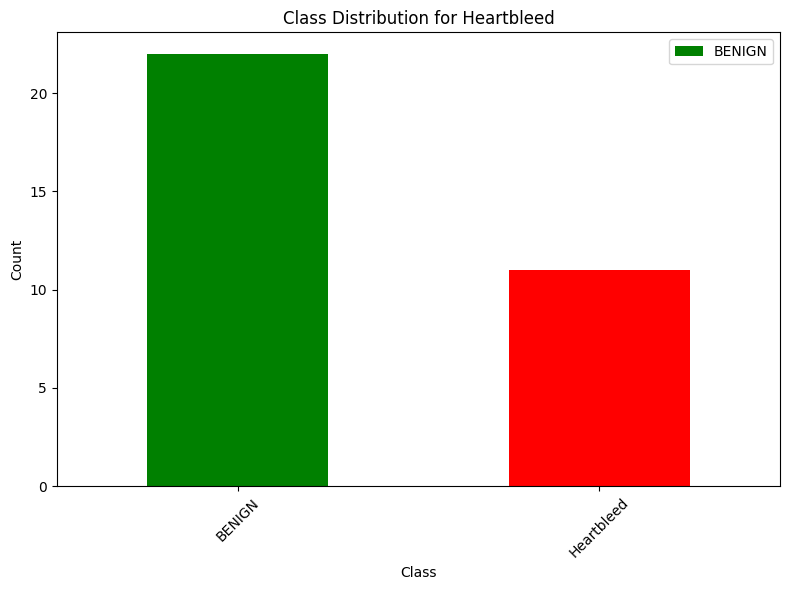

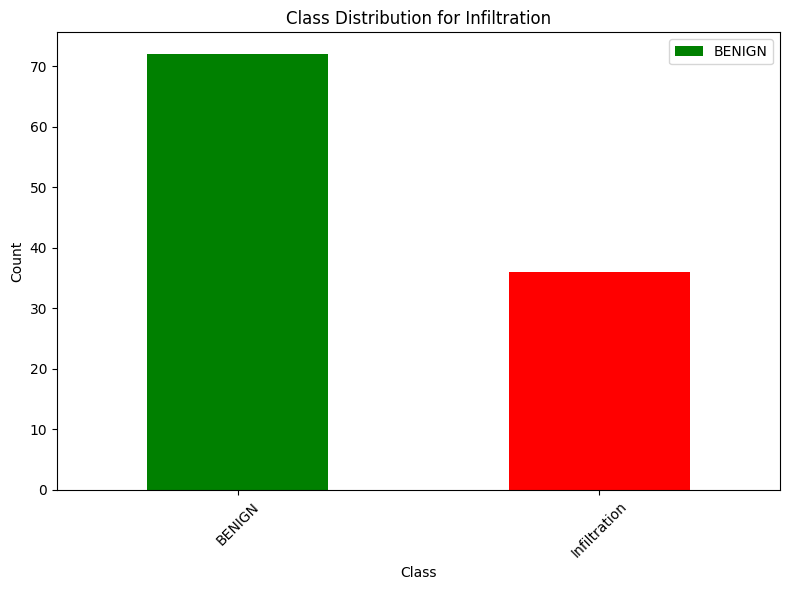

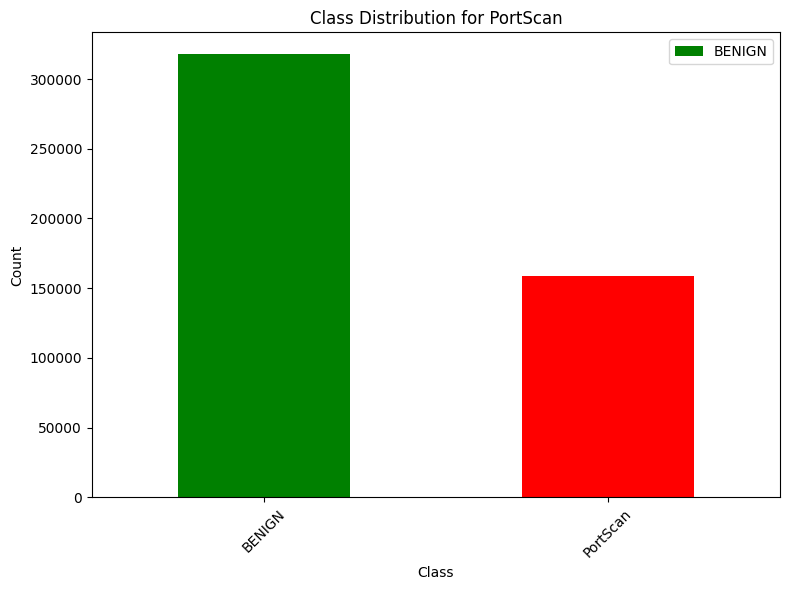

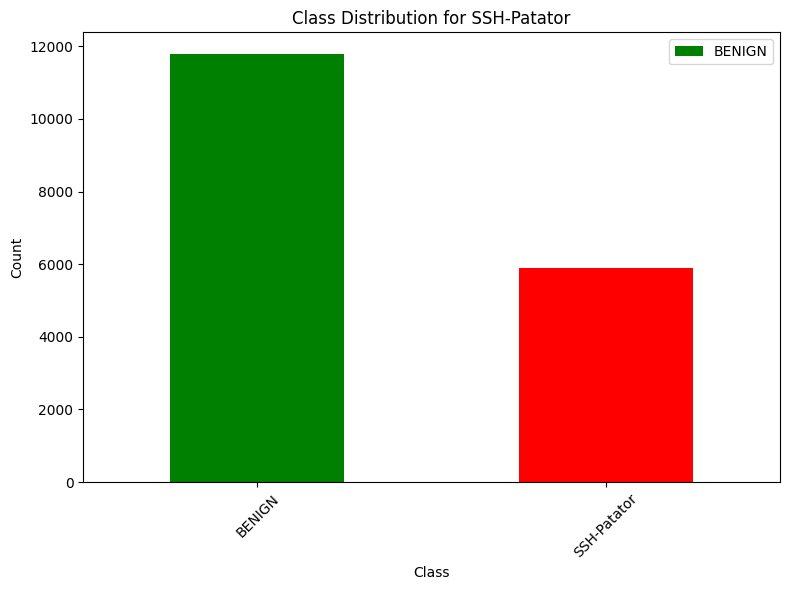

/var/folders/bn/94l881_968nczt_7xjx8985r0000gn/T/ipykernel_65533/374281337.py:21: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/carl/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


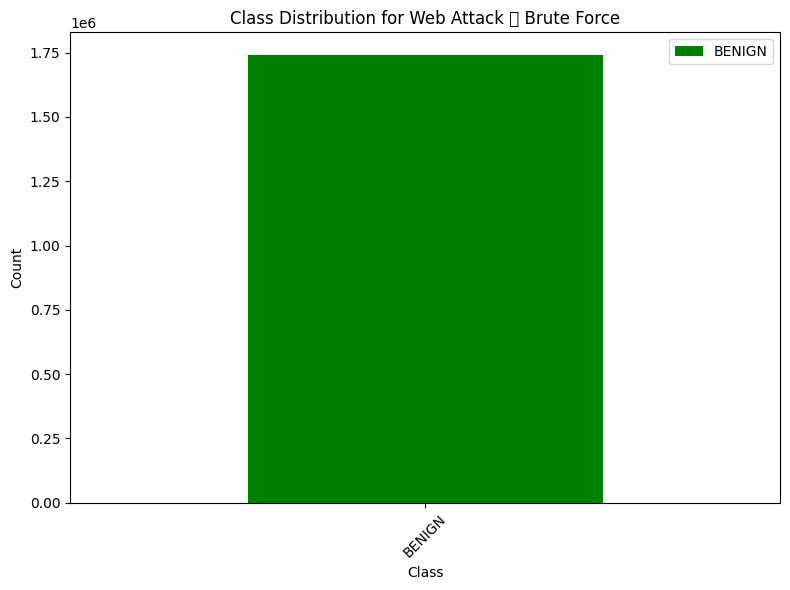

/var/folders/bn/94l881_968nczt_7xjx8985r0000gn/T/ipykernel_65533/374281337.py:21: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/carl/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


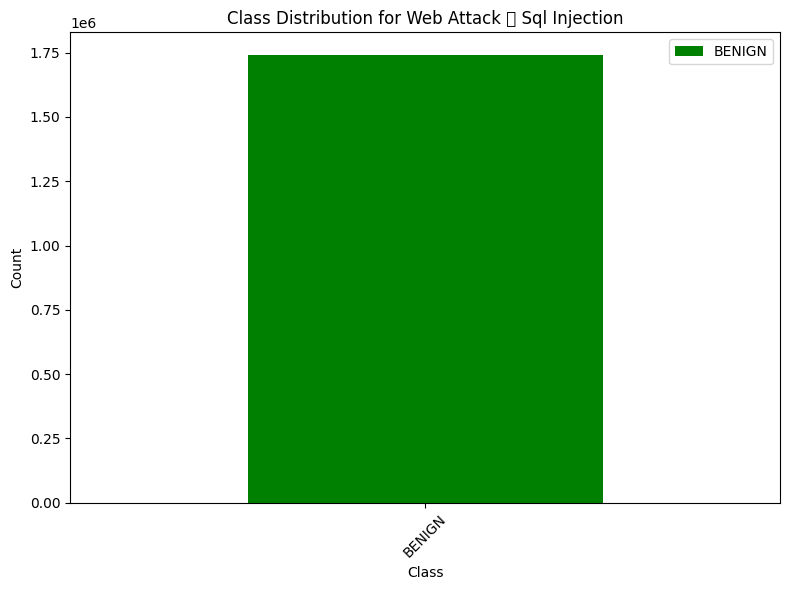

/var/folders/bn/94l881_968nczt_7xjx8985r0000gn/T/ipykernel_65533/374281337.py:21: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/carl/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


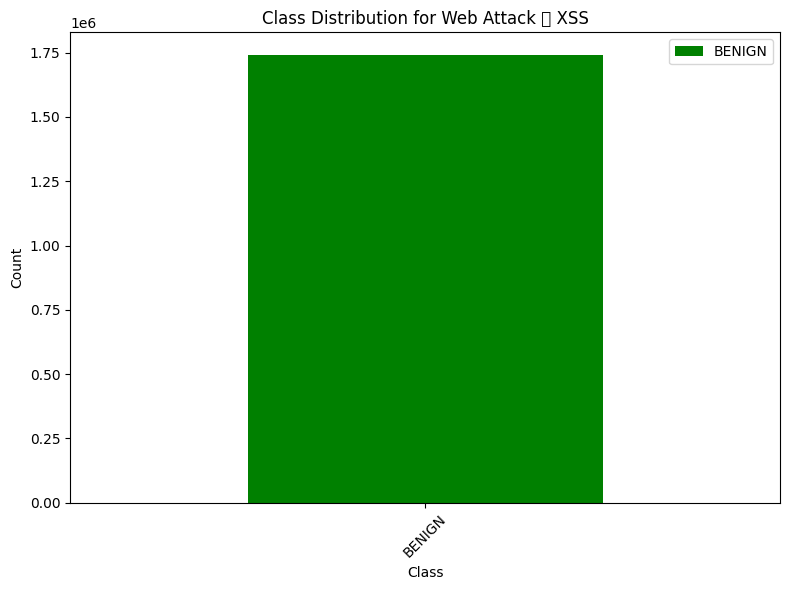

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Loop through each attack type
for attack_type in attack_types:
    # Load the new data file
    input = f"{attack_type}_vs_{benign_type}.csv"
    new_data = pd.read_csv(input)
    
    # Count the number of instances for each class
    class_counts = new_data[" Label"].value_counts()
    
    # Plot the class distribution
    plt.figure(figsize=(8, 6))
    class_counts.plot(kind="bar", color=["green", "red"])
    plt.title(f"Class Distribution for {attack_type}")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(["BENIGN", attack_type])
    plt.tight_layout()
    plt.show()